In [21]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import random

#### Đọc dữ liệu

In [22]:
# Tạo DataFrame
df = pd.read_csv('sinh_vien_data.csv')

# Lưu dữ liệu vào file CSV
df

,Họ và tên,Điểm 1,Điểm 2,Điểm 3,Điểm thi
0,Phan Trọng Tú,9,4,9,10
1,Lê Trọng Hương,7,0,7,7
2,Phạm Quốc Nam,8,2,4,5
3,Đặng Duy Trang,2,9,5,8
4,Phan Anh Nam,0,9,1,3
...,...,...,...,...,...
1995,Bùi Hữu Hạnh,1,8,0,4
1996,Hoàng Tấn Khánh,6,5,8,8
1997,Đỗ Minh Phương,10,7,4,9
1998,Trần Anh Hạnh,10,0,9,8


#### Vẽ các biểu đồ phân phối các cột của dữ liệu

##### Cột điểm 1

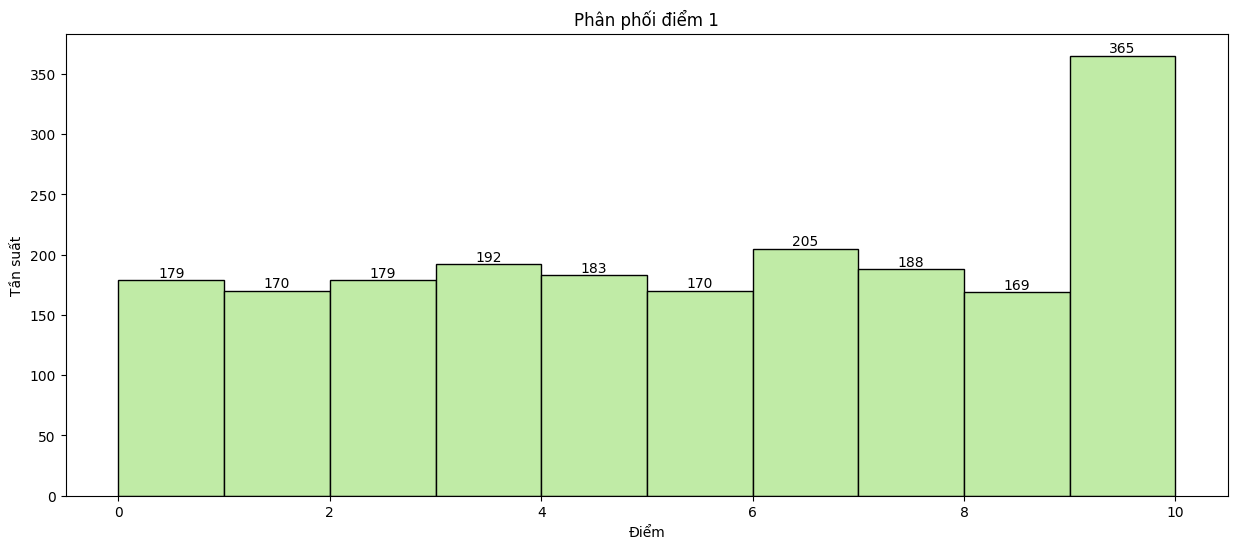

In [23]:
# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 1"], bins=10, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 1')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm 2

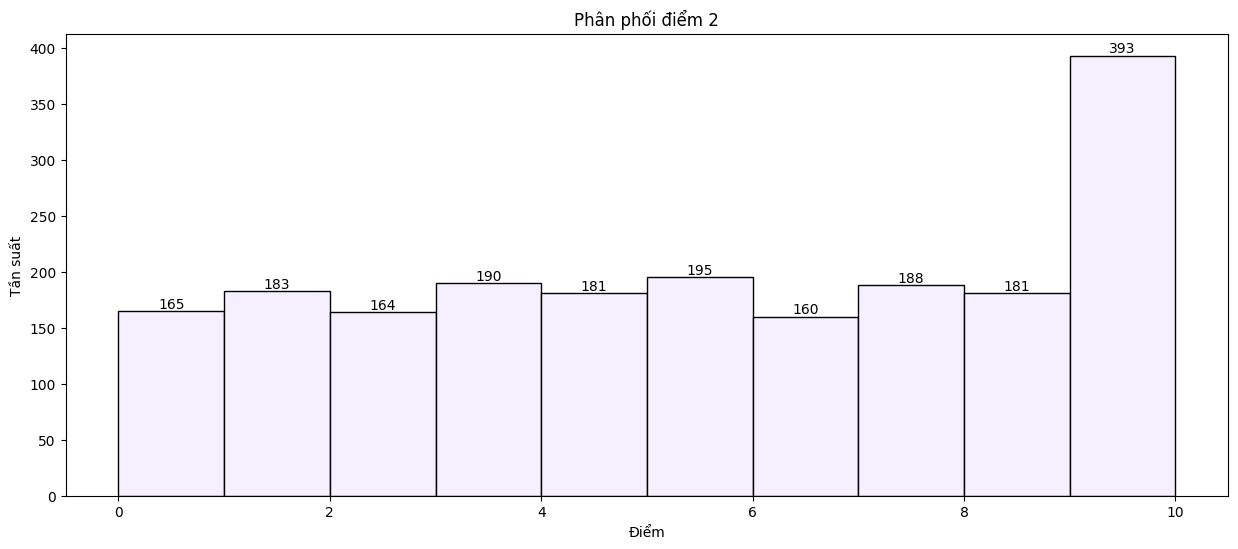

In [24]:
# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 2"], bins=10, color='#F5EFFF', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 2')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm 3

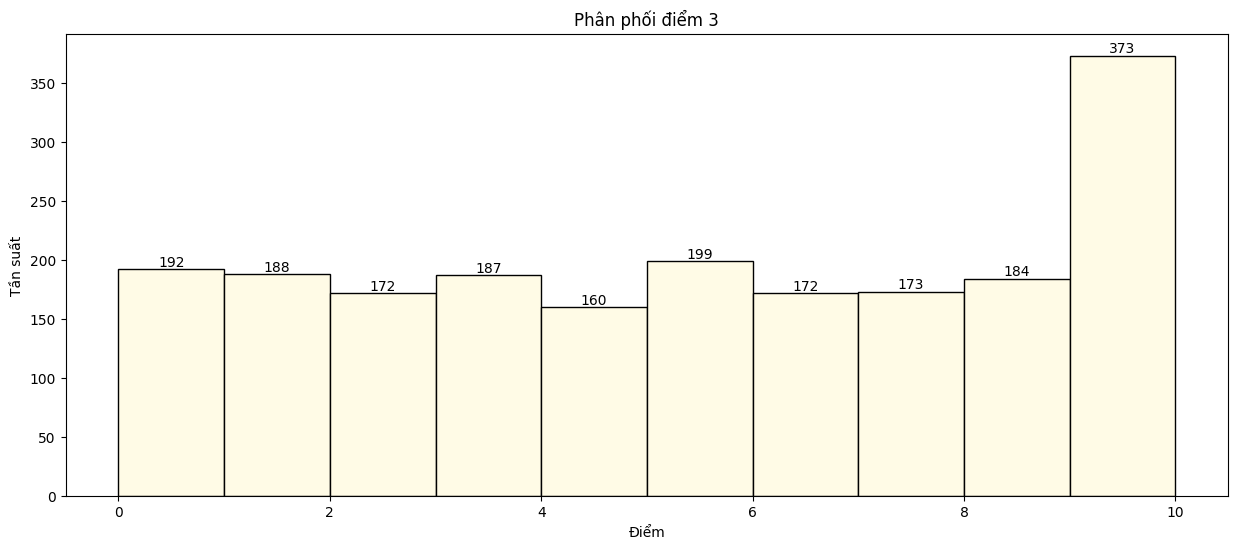

In [25]:

# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 3"], bins=10, color='#FFFBE6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 3')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm thi

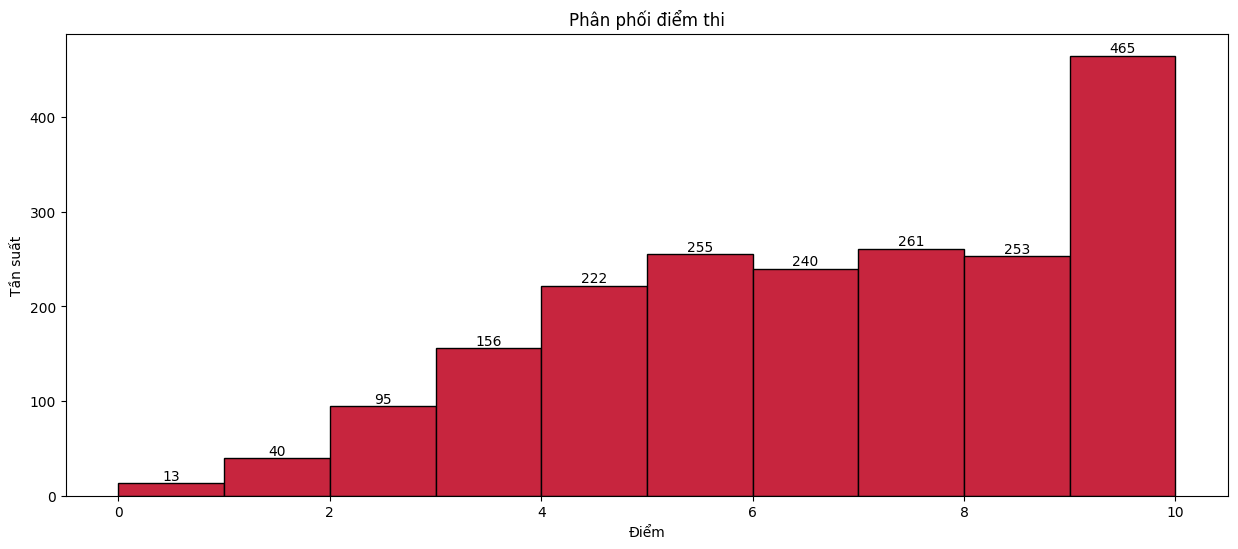

In [26]:

# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm thi"], bins=10, color='#C7253E', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm thi')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


#### Huấn luyện mô hình

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

##### Chọn ra các features và chia tập train-test

In [28]:
X = df.drop(columns=["Họ và tên", "Điểm thi"])
y = df["Điểm thi"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##### Chuẩn hóa dữ liệu của các features

In [30]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Mô hình Linear Regression

In [31]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)

##### Mô hình CNN

Epoch 1/500, Train Loss: 130.1610, Test Loss: 15.4800
Epoch 2/500, Train Loss: 6.9896, Test Loss: 3.1780
Epoch 3/500, Train Loss: 2.3755, Test Loss: 1.5175
Epoch 4/500, Train Loss: 1.3697, Test Loss: 1.1378
Epoch 5/500, Train Loss: 1.1091, Test Loss: 0.9826
Epoch 6/500, Train Loss: 0.9800, Test Loss: 0.8805
Epoch 7/500, Train Loss: 0.8949, Test Loss: 0.8053
Epoch 8/500, Train Loss: 0.8368, Test Loss: 0.7518
Epoch 9/500, Train Loss: 0.7971, Test Loss: 0.7150
Epoch 10/500, Train Loss: 0.7651, Test Loss: 0.6847
Epoch 11/500, Train Loss: 0.7359, Test Loss: 0.6617
Epoch 12/500, Train Loss: 0.7145, Test Loss: 0.6453
Epoch 13/500, Train Loss: 0.6974, Test Loss: 0.6324
Epoch 14/500, Train Loss: 0.6848, Test Loss: 0.6226
Epoch 15/500, Train Loss: 0.6741, Test Loss: 0.6137
Epoch 16/500, Train Loss: 0.6647, Test Loss: 0.6059
Epoch 17/500, Train Loss: 0.6559, Test Loss: 0.5986
Epoch 18/500, Train Loss: 0.6482, Test Loss: 0.5914
Epoch 19/500, Train Loss: 0.6414, Test Loss: 0.5854
Epoch 20/500, Trai

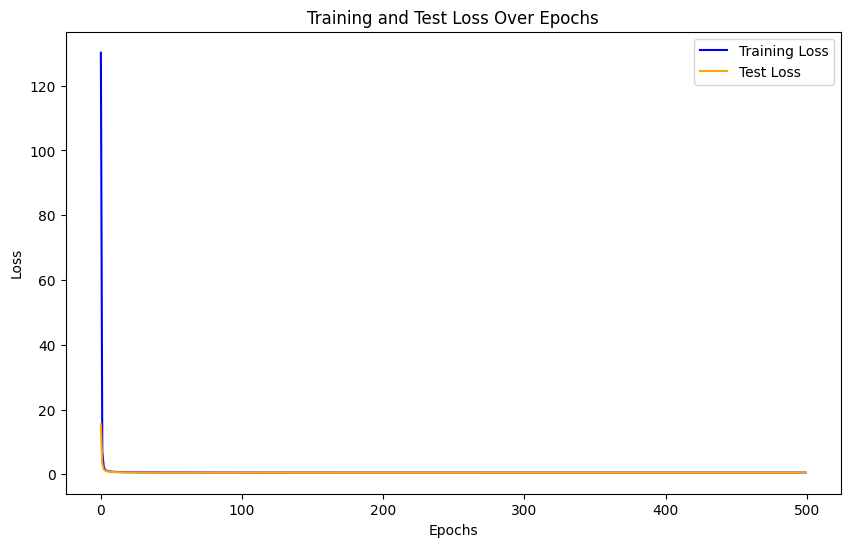

In [32]:
import tensorflow as tf

class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = tf.Variable(tf.random.normal([1, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1 = tf.Variable(tf.random.normal([96, 48]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2 = tf.Variable(tf.random.normal([48, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 3, 1, 1])  # Reshape input thành [batch_size, height=2, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 96])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2)  # Output layer
        return output
    
# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Giả định đã có dữ liệu X_train, y_train, X_test, y_test
X_train_dl = X_train.astype(np.float32)
y_train_dl = y_train.astype(np.float32)
X_test_dl = X_test.astype(np.float32)
y_test_dl = y_test.astype(np.float32)

# Lưu giá trị loss
train_loss_values = []
test_loss_values = []

# Huấn luyện mô hình
epochs = 500
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    # Huấn luyện
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    
    avg_train_loss = epoch_loss / (len(X_train_dl) // batch_size)
    train_loss_values.append(avg_train_loss)

    # Tính loss của tập test
    test_predictions = model(X_test_dl)
    test_loss = loss_fn(y_test_dl, test_predictions)
    avg_test_loss = test_loss.numpy()
    test_loss_values.append(avg_test_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_values, label='Training Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


In [33]:
# test_loss = loss_fn(y_test_dl, model(X_test_dl)).numpy()
y_pred = model(X_test_dl)

In [34]:
mse_cnn = mean_squared_error(y_test_dl, y_pred)
mae_cnn = mean_absolute_error(y_test_dl, y_pred)
mape_cnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_cnn = root_mean_squared_error(y_test_dl, y_pred)

In [35]:
# save model
np.save('conv1_weights.npy', model.conv1.numpy())
np.save('dense1_weights.npy', model.dense1.numpy())
np.save('dense2_weights.npy', model.dense2.numpy())

##### Mô hình RNN

In [36]:
import tensorflow as tf

# Giả định đã có dữ liệu X_train, y_train, X_test, y_test
# Dưới đây là mô hình RNN được định nghĩa như trên
class SimpleRNN:
    def __init__(self, input_size, hidden_sizes):
        # hidden_sizes là danh sách chứa số đơn vị ẩn cho mỗi lớp, ví dụ: [64, 64, 64, 64, 64]
        self.hidden_sizes = hidden_sizes
        self.num_layers = len(hidden_sizes)

        # Tạo các trọng số và bias cho từng lớp ẩn
        self.Wxhs = [tf.Variable(tf.random.normal([input_size if i == 0 else hidden_sizes[i-1], hidden_sizes[i]]), name=f'Wxh_{i}') for i in range(self.num_layers)]
        self.Whhs = [tf.Variable(tf.random.normal([hidden_sizes[i], hidden_sizes[i]]), name=f'Whh_{i}') for i in range(self.num_layers)]
        self.bhs = [tf.Variable(tf.zeros([hidden_sizes[i]]), name=f'bh_{i}') for i in range(self.num_layers)]

        # Trọng số và bias cho lớp đầu ra (output layer)
        self.Why = tf.Variable(tf.random.normal([hidden_sizes[-1], 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, hs):
        # hs là danh sách trạng thái ẩn cho từng lớp ẩn
        new_hs = []
        for i in range(self.num_layers):
            # Tính toán trạng thái ẩn cho từng lớp
            h = tf.tanh(tf.matmul(x if i == 0 else hs[i-1], self.Wxhs[i]) + tf.matmul(hs[i], self.Whhs[i]) + self.bhs[i])
            new_hs.append(h)
        return new_hs

    def forward(self, x):
        # Khởi tạo trạng thái ẩn cho tất cả các lớp với kích thước [batch_size, hidden_size]
        hs = [tf.zeros([x.shape[0], hidden_size]) for hidden_size in self.hidden_sizes]

        # Lặp qua từng bước thời gian
        for t in range(x.shape[1]):
            hs = self.step(x[:, t, :], hs)

        # Đầu ra dựa trên trạng thái ẩn của lớp cuối cùng
        y = tf.matmul(hs[-1], self.Why) + self.by
        return y

    @property
    def trainable_variables(self):
        # Trả về danh sách tất cả các biến có thể train
        return self.Wxhs + self.Whhs + self.bhs + [self.Why, self.by]

# Tạo mô hình
model = SimpleRNN(input_size=3, hidden_sizes=[64, 64, 64, 64, 64])

# Tạo optimizer
optimizer = tf.optimizers.Adam()

# Hàm tính loss
loss_fn = tf.losses.MeanSquaredError()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Hàm tính loss trên tập test
@tf.function
def test_loss(x, y):
    predictions = model.forward(x)
    loss = loss_fn(y, predictions)
    return loss

# Chuyển đổi dữ liệu sang định dạng phù hợp
X_train_dl = X_train.astype(np.float32).reshape(-1, 1, 3)
y_train_dl = y_train.values.astype(np.float32).reshape(-1, 1, 1)
X_test_dl = X_test.astype(np.float32).reshape(-1, 1, 3)
y_test_dl = y_test.values.astype(np.float32).reshape(-1, 1, 1)

# Định nghĩa số epoch và batch size
epochs = 500
batch_size = 32

# List lưu loss để vẽ biểu đồ
train_losses = []
test_losses = []

# Vòng lặp huấn luyện
for epoch in range(epochs):
    # Huấn luyện trên tập train
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        train_loss = train_step(X_batch, y_batch)
    
    # Tính loss trên tập test sau mỗi epoch
    test_loss_value = test_loss(X_test_dl, y_test_dl)
    
    # Lưu lại loss để vẽ biểu đồ
    train_losses.append(train_loss.numpy())
    test_losses.append(test_loss_value.numpy())
    
    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.numpy():.4f}, Test Loss: {test_loss_value.numpy():.4f}')

C:\Users\xin chao\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['Wxh_0:0', 'Wxh_1:0', 'Wxh_2:0', 'Wxh_3:0', 'Whh_0:0', 'Whh_1:0', 'Whh_2:0', 'Whh_3:0', 'bh_0:0', 'bh_1:0', 'bh_2:0', 'bh_3:0'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 1/500, Train Loss: 27.6422, Test Loss: 19.2341
Epoch 2/500, Train Loss: 11.7071, Test Loss: 8.2547
Epoch 3/500, Train Loss: 6.9526, Test Loss: 6.2796
Epoch 4/500, Train Loss: 6.1541, Test Loss: 6.2753
Epoch 5/500, Train Loss: 6.0756, Test Loss: 6.2919
Epoch 6/500, Train Loss: 6.0763, Test Loss: 6.2919
Epoch 7/500, Train Loss: 6.0785, Test Loss: 6.2916
Epoch 8/500, Train Loss: 6.0802, Test Loss: 6.2914
Epoch 9/500, Train Loss: 6.0816, Test Loss: 6.2912
Epoch 10/500, Train Loss: 6.0830, Test Loss: 6.2911
Epoch 11/500, Train Loss: 6.0842, Test Loss: 6.2910
Epoch 12/500, Train Loss: 6.0852, Test Loss: 6.2909
Epoch 13/500, Train Loss: 6.0861, Test Loss: 6.2909
Epoch 14/500, Train Loss: 6.0870, Test Loss: 6.2909
Epoch 15/500, Train Loss: 6.0877, Test Loss: 6.2909
Epoch 16/500, Train Loss: 6.0883, Test Loss: 6.2909
Epoch 17/500, Train Loss: 6.0888, Test Loss: 6.2910
Epoch 18/500, Train Loss: 6.0892, Test Loss: 6.2911
Epoch 19/500, Train Loss: 6.0895, Test Loss: 6.2912
Epoch 20/500, Trai

In [37]:
y_pred = model.forward(X_test_dl.reshape(-1, 1, 3))

In [38]:
y_test_dl = y_test_dl.reshape(-1, 1)
y_test_dl.shape

(400, 1)

In [39]:
mse_rnn = mean_squared_error(y_test, y_pred)
mae_rnn = mean_absolute_error(y_test_dl, y_pred)
mape_rnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_rnn = root_mean_squared_error(y_test_dl, y_pred)

In [40]:
for i in model.trainable_variables:
    np.save(f'{i.name[:-2]}.npy', i.numpy())

In [41]:
from tensorflow.keras import layers, models

input_shape = (3, 1)  # 2 đặc trưng và 1 kênh (channel)

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Input(shape=input_shape),                      # Layer 1: Input layer
    layers.Conv1D(32, kernel_size=1, activation='relu'),   # Layer 2: Convolutional layer
    layers.Conv1D(64, kernel_size=1, activation='relu'),   # Layer 3: Convolutional layer
    layers.Flatten(),                                     # Layer 4: Flatten layer
    layers.Dense(64, activation='relu'),                   # Layer 5: Fully connected layer
    layers.Dense(1)                                        # Output layer: Dự đoán điểm cuối cùng
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# In tóm tắt mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))   

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.4565 - val_loss: 2.9980
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1622 - val_loss: 1.3237
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2474 - val_loss: 0.8114
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7402 - val_loss: 0.5270
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5643 - val_loss: 0.4911
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5660 - val_loss: 0.4864
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5673 - val_loss: 0.4891
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5725 - val_loss: 0.4892
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5422 - val_loss: 0.4854
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5595 - val_loss: 0.5054
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5725 - val_loss: 0.4965
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5544 - val_l

In [43]:
model.save("cnn.h5")

In [44]:
y_pred = model.predict(X_test)

mse_cnn_keras = mean_squared_error(y_test, y_pred)
mae_cnn_keras = mean_absolute_error(y_test, y_pred)
mape_cnn_keras = mean_absolute_percentage_error(y_test, y_pred)
rmse_cnn_keras = root_mean_squared_error(y_test, y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [45]:
model = models.Sequential([
    layers.Input(shape=(3, 1)),                     # Layer 1: Input layer
    layers.SimpleRNN(32, activation='relu', return_sequences=True),  # Layer 2: RNN layer (trả về toàn bộ chuỗi)
    layers.SimpleRNN(64, activation='relu'),        # Layer 3: RNN layer
    layers.Dense(32, activation='relu'),            # Layer 4: Fully connected layer
    layers.Dense(1)                                 # Output layer: Dự đoán điểm cuối cùng
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# In tóm tắt mô hình
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 3, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 31.0876 - val_loss: 3.4232
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9843 - val_loss: 1.6120
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4306 - val_loss: 0.8185
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7601 - val_loss: 0.5686
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6181 - val_loss: 0.5270
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6244 - val_loss: 0.5334
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5830 - val_loss: 0.5199
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5699 - val_loss: 0.4946
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5582 - val_loss: 0.5188
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5702 - val_loss: 0.5121
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5572 - val_loss: 0.5274
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5539 - val_l

In [47]:
y_pred = model.predict(X_test)

mse_rnn_keras = mean_squared_error(y_test, y_pred)
mae_rnn_keras = mean_absolute_error(y_test, y_pred)
mape_rnn_keras = mean_absolute_percentage_error(y_test, y_pred)
rmse_rnn_keras = root_mean_squared_error(y_test, y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [48]:
# Save model
model.save('rnn.h5')

#### So sánh độ mất mát của 5 mô hình Linear Regression - CNN - RNN - CNN keras - RNN keras

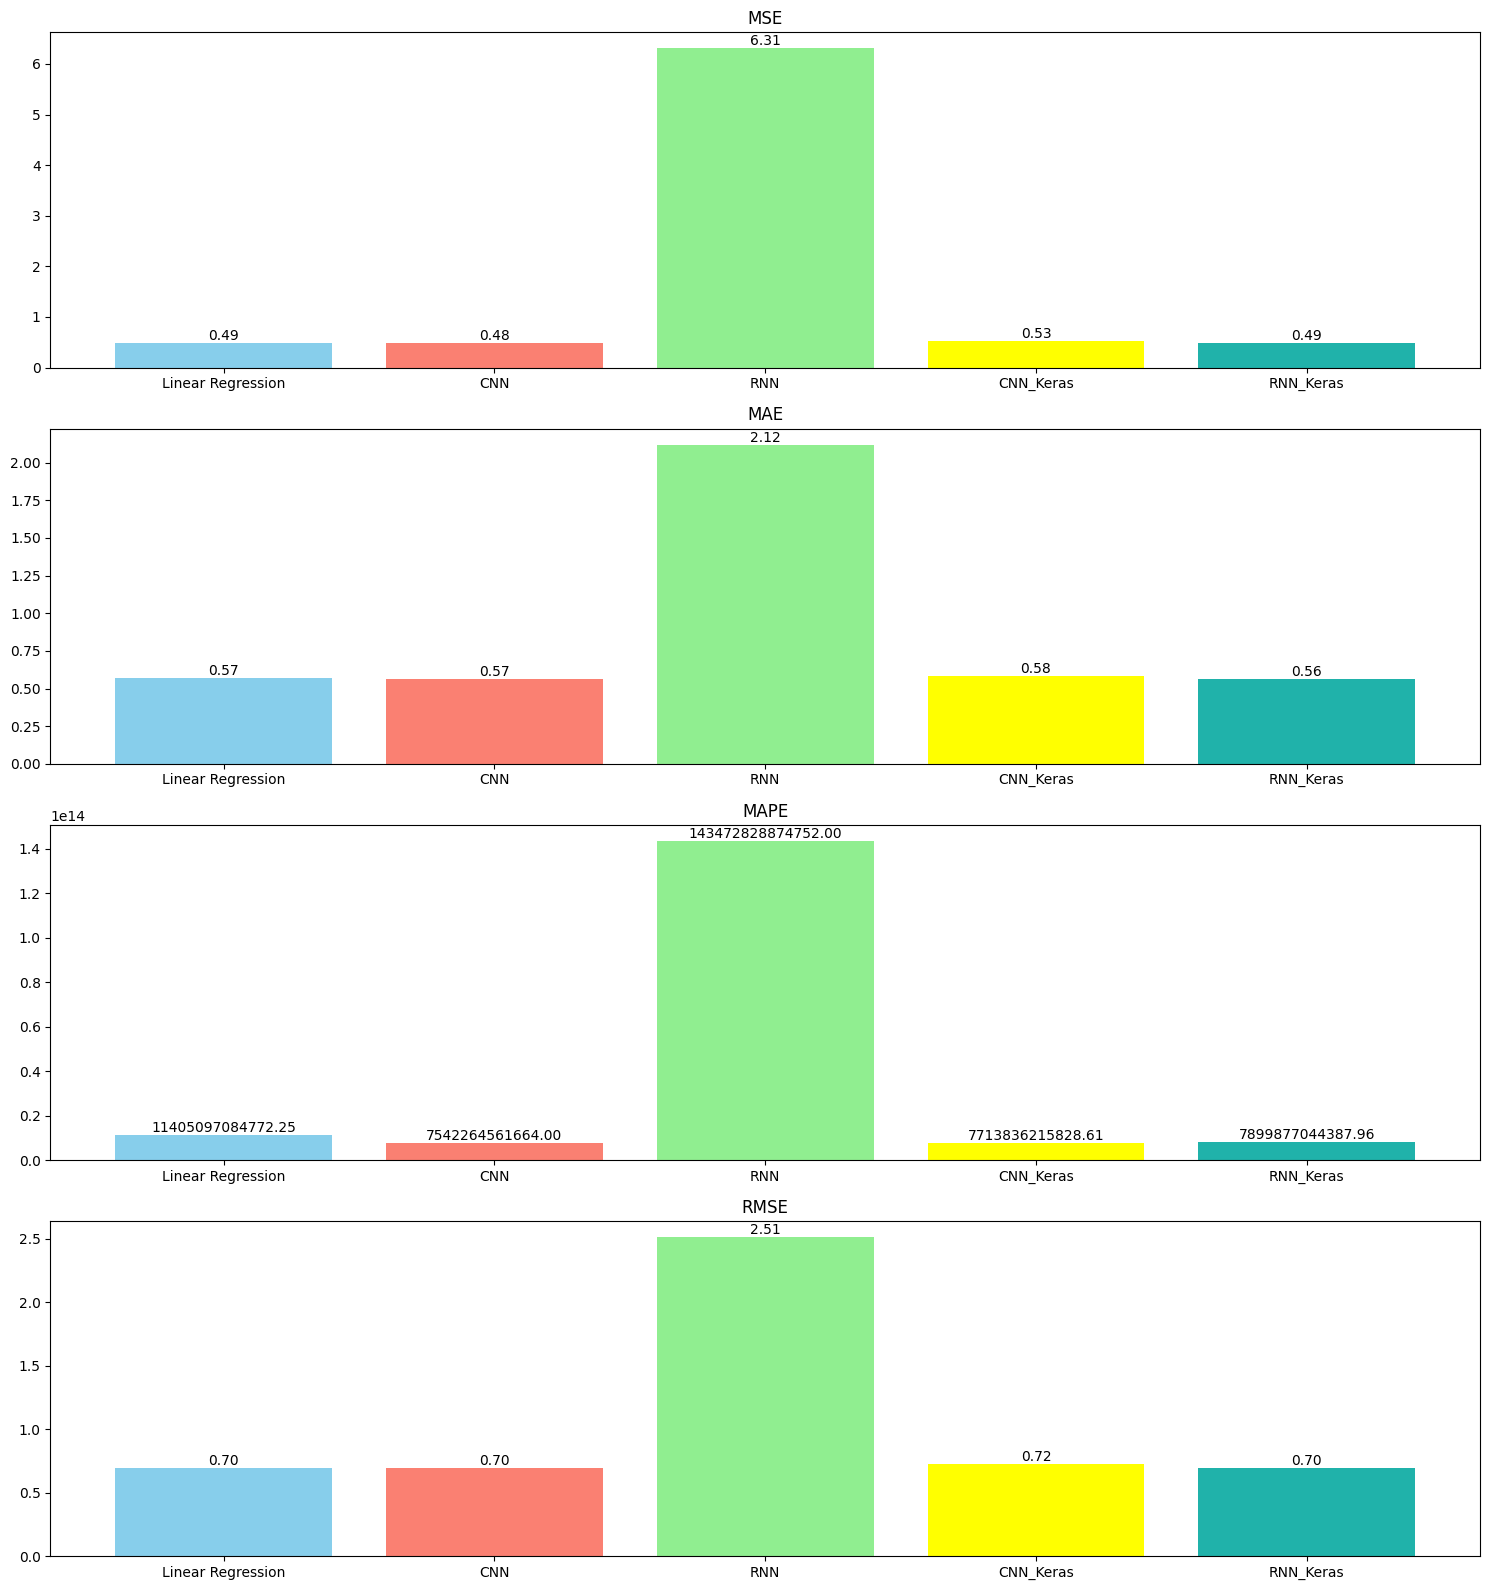

In [49]:
fig, ax = plt.subplots(4, 1, figsize=(15, 16))

bar1 = ax[0].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mse_lr, mse_cnn, mse_rnn, mse_cnn_keras, mse_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[0].set_title("MSE")
for bar in bar1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar2 = ax[1].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mae_lr, mae_cnn, mae_rnn, mae_cnn_keras, mae_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[1].set_title("MAE")
for bar in bar2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar3 = ax[2].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mape_lr, mape_cnn, mape_rnn, mape_cnn_keras, mape_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[2].set_title("MAPE")
for bar in bar3:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar4 = ax[3].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [rmse_lr, rmse_cnn, rmse_rnn, rmse_cnn_keras, rmse_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[3].set_title("RMSE")
for bar in bar4:
    height = bar.get_height()
    ax[3].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()